# Grand Chessboard 20 years later

This notebook aims to provide qunatitative information on the variables that appeared in the book "The Grand Chessboard" by Zbigniew Brzezinski first published in 1997.

Data used are for years: 1997 and 2017-18 and the period in-between.

The focus in on analyzing the relative role of the USA/North America in the global system. To this end selected measures are used.


The "Grand Chessboard" is, rather arbitrarily, classified into the following zones in this analysis:
1. European Union - represents the European Rimland
2. Eastern and Southern Asia - represents Asian Rimland
3. Middle East
4. Heartland



The overview is split in the following (also quite arbitrary) sections:
1. Population
2. Economy
3. Energy
4. Military



In [40]:
library(ggplot2, quietly = TRUE)
library(data.table, quietly = TRUE)
library(zoo, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(magrittr, quietly = TRUE)
library(stringr, quietly = TRUE)
library(reshape2, quietly = TRUE)


Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt



## 1. Population

In [28]:
# load data on population
dtPopulationData <- read.csv(file = file.path(getwd(), "data", 
                                              "GrandChessboardPopulationData.csv"),
                             na.strings = "..", stringsAsFactors = FALSE) %>%
  data.table::as.data.table()
data.table::setnames(x = dtPopulationData, 
                     old = c(
                       "Country.Name",
                       "Population..total..SP.POP.TOTL.",
                       "Urban.population..SP.URB.TOTL.",
                       "Rural.population..SP.RUR.TOTL.",
                       "Individuals.using.the.Internet....of.population...IT.NET.USER.ZS.",
                       "Access.to.electricity....of.population...EG.ELC.ACCS.ZS.",
                       "Secure.Internet.servers..IT.NET.SECR.",
                       "Poverty.headcount.ratio.at..1.90.a.day..2011.PPP.....of.population...SI.POV.DDAY.",
                       "Poverty.headcount.ratio.at..3.20.a.day..2011.PPP.....of.population...SI.POV.LMIC.",
                       "Poverty.headcount.ratio.at..5.50.a.day..2011.PPP.....of.population...SI.POV.UMIC.",
                       "Poverty.headcount.ratio.at.national.poverty.lines....of.population...SI.POV.NAHC.",
                       "Electric.power.consumption..kWh.per.capita...EG.USE.ELEC.KH.PC."
                     ), 
                     new = c(
                       "country",
                       "total_population_headcount",
                       "urban_population_headcount",
                       "rural_population_headcount",
                       "internet_acces_percentage",
                       "electricity_access_percentage",
                       "secure_internet_servers_count",
                       "poverty_headcount_at_1dot90",
                       "poverty_headcount_at_3dot20",
                       "poverty_headcount_at_5dot50",
                       "poverty_headcount_at_national_poverty_lvl",
                       "electric_power_consumption_kwh_per_capita"
                     ))
dtPopulationData <- 
  dtPopulationData %>% dplyr::select(-Time.Code, -Country.Code) %>%
  data.table::as.data.table()
dtPopulationData <- dtPopulationData[order(country), ]
head(dtPopulationData)
tail(dtPopulationData)

Time,country,total_population_headcount,urban_population_headcount,rural_population_headcount,internet_acces_percentage,electricity_access_percentage,secure_internet_servers_count,poverty_headcount_at_1dot90,poverty_headcount_at_3dot20,poverty_headcount_at_5dot50,poverty_headcount_at_national_poverty_lvl,electric_power_consumption_kwh_per_capita
1969,Afghanistan,10854428,1223837,9630591,NA,NA,NA,NA,NA,NA,NA,NA
1970,Afghanistan,11126123,1295415,9830708,NA,NA,NA,NA,NA,NA,NA,NA
1971,Afghanistan,11417825,1372537,10045288,NA,NA,NA,NA,NA,NA,NA,NA
1972,Afghanistan,11721940,1454693,10267247,NA,NA,NA,NA,NA,NA,NA,NA
1973,Afghanistan,12027822,1540644,10487178,NA,NA,NA,NA,NA,NA,NA,NA
1974,Afghanistan,12321541,1628785,10692756,NA,NA,NA,NA,NA,NA,NA,NA


Time,country,total_population_headcount,urban_population_headcount,rural_population_headcount,internet_acces_percentage,electricity_access_percentage,secure_internet_servers_count,poverty_headcount_at_1dot90,poverty_headcount_at_3dot20,poverty_headcount_at_5dot50,poverty_headcount_at_national_poverty_lvl,electric_power_consumption_kwh_per_capita
2013,Zimbabwe,15054506,4915898,10138608,"15,50000","37,07681",64,NA,NA,NA,NA,"557,5739"
2014,Zimbabwe,15411675,5009411,10402264,"16,36474","32,30000",108,NA,NA,NA,NA,"536,9955"
2015,Zimbabwe,15777451,5109528,10667923,"22,74282","33,70000",162,NA,NA,NA,NA,NA
2016,Zimbabwe,16150362,5215921,10934441,"23,11999","38,14514",194,NA,NA,NA,NA,NA
2017,Zimbabwe,16529904,5328745,11201159,NA,NA,435,NA,NA,NA,NA,NA
2018,Zimbabwe,NA,NA,NA,NA,NA,673,NA,NA,NA,NA,NA


In [29]:
# select regions of interest
cRegionsOfInterest <- c(
  "North America",
  "European Union",
  "Latin America & Caribbean",
  "South Asia",
  "East Asia & Pacific",
  "Middle East & North Africa"
)
dtPopulationDataByRegion <- dtPopulationData[country %in% cRegionsOfInterest & 
                                               Time %in% c(1997, 2017), ]
dtPopulationDataByRegion$Time <- as.character(dtPopulationDataByRegion$Time)
dtPopulationDataByRegion$country_wrap <- 
  stringr::str_wrap(dtPopulationDataByRegion$country, width = 10L)
dtPopulationDataByRegion$total_population_headcount <- 
    round(dtPopulationDataByRegion$total_population_headcount/10^6, 2L)

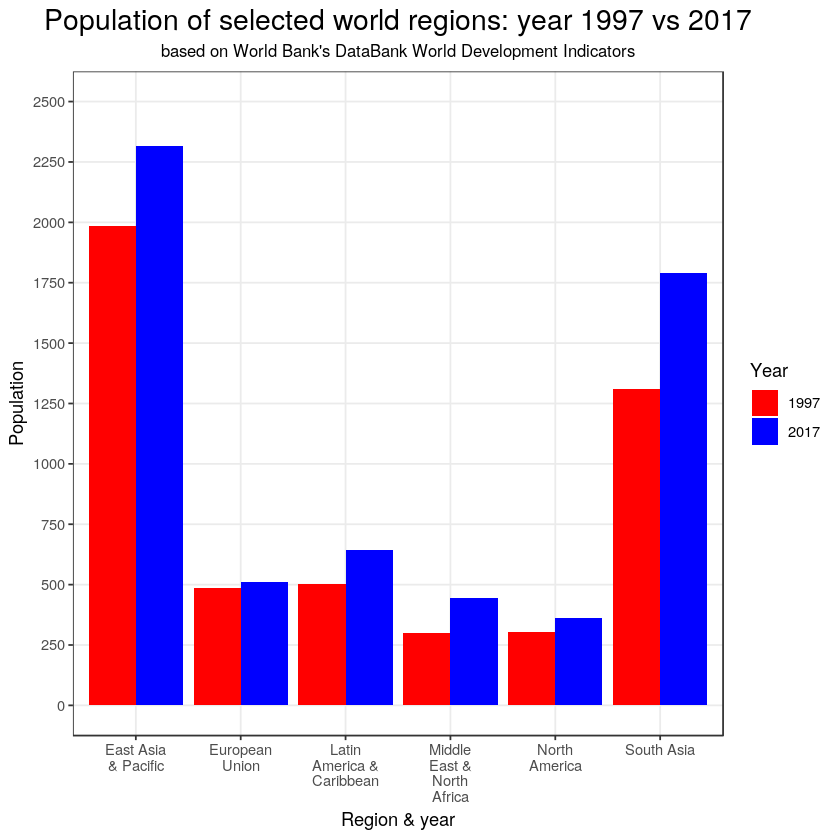

In [30]:
# total populations comparison
plotBarChartPopulation <- ggplot2::ggplot(data = dtPopulationDataByRegion) +
  ggplot2::aes(x = country_wrap, y = total_population_headcount, 
               fill = Time) + 
  ggplot2::geom_bar(stat = "identity", position = ggplot2::position_dodge()) + 
  ggplot2::theme_bw() +
  ggplot2::xlab(label = "Region & year") +
  ggplot2::ylab(label = "Population") +
  ggplot2::scale_fill_manual(values = c("red", "blue")) +
  ggplot2::ggtitle(label = "Population of selected world regions: year 1997 vs 2017", 
                   subtitle = "based on World Bank's DataBank World Development Indicators") +
  ggplot2::theme(plot.title = ggplot2::element_text(hjust = 0.5, size = 17), 
                 plot.subtitle = ggplot2::element_text(hjust = 0.5, size = 10)) +
  ggplot2::scale_y_continuous(breaks = seq(0, 2500, 250), 
                              minor_breaks = seq(0, 2500, 250), 
                              labels = seq(0, 2500, 250), limits = c(0, 2500)) +
  ggplot2::labs(fill = "Year")
plotBarChartPopulation

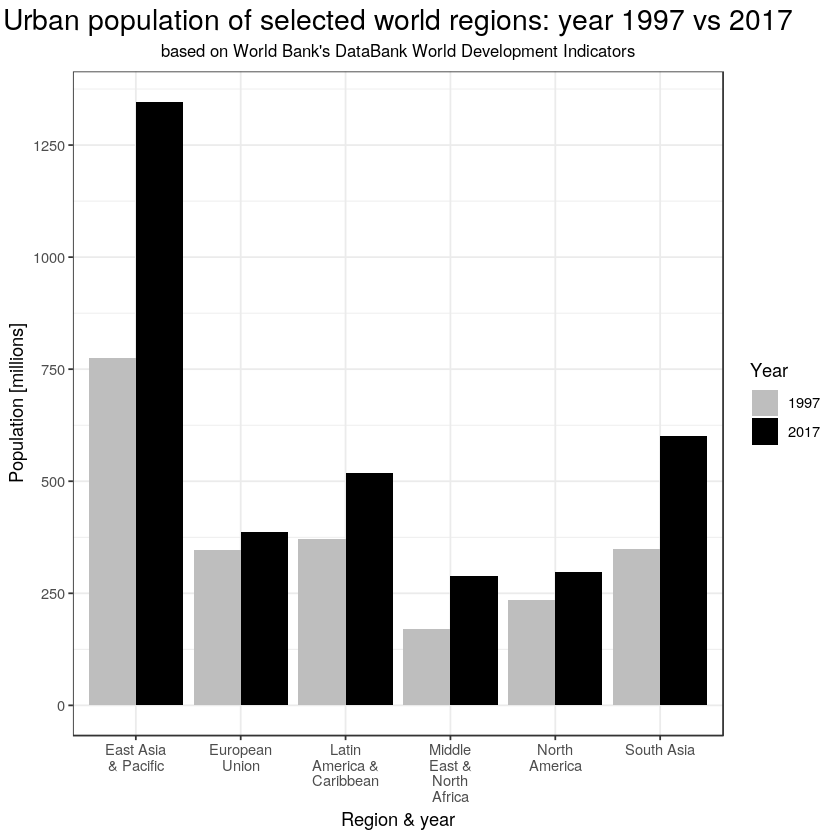

In [31]:
# urban populations' comparison
dtPopulationDataByRegion$urban_population_headcount <-
  round(dtPopulationDataByRegion$urban_population_headcount/10^6, 0)

plotBarChartUrbanPopulation <- ggplot2::ggplot(data = dtPopulationDataByRegion) +
  ggplot2::aes(x = country_wrap, y = urban_population_headcount, fill = Time) +
  ggplot2::geom_bar(stat = "identity", 
                    position = ggplot2::position_dodge()) +
  ggplot2::theme_bw() +
  ggplot2::scale_fill_manual(values = c("grey", "black")) +
  ggplot2::scale_y_continuous(breaks = seq(0, 1500, 250), 
                              labels = seq(0, 1500, 250)) +
  ggplot2::ggtitle(label = "Urban population of selected world regions: year 1997 vs 2017", 
                   subtitle = "based on World Bank's DataBank World Development Indicators") +
  ggplot2::theme(plot.title = ggplot2::element_text(hjust = 0.5, size = 17), 
                 plot.subtitle = ggplot2::element_text(hjust = 0.5, size = 10)) +
  ggplot2::ylab(label = "Population [millions]") + 
  ggplot2::xlab(label = "Region & year") +
  ggplot2::labs(fill = "Year")
plotBarChartUrbanPopulation

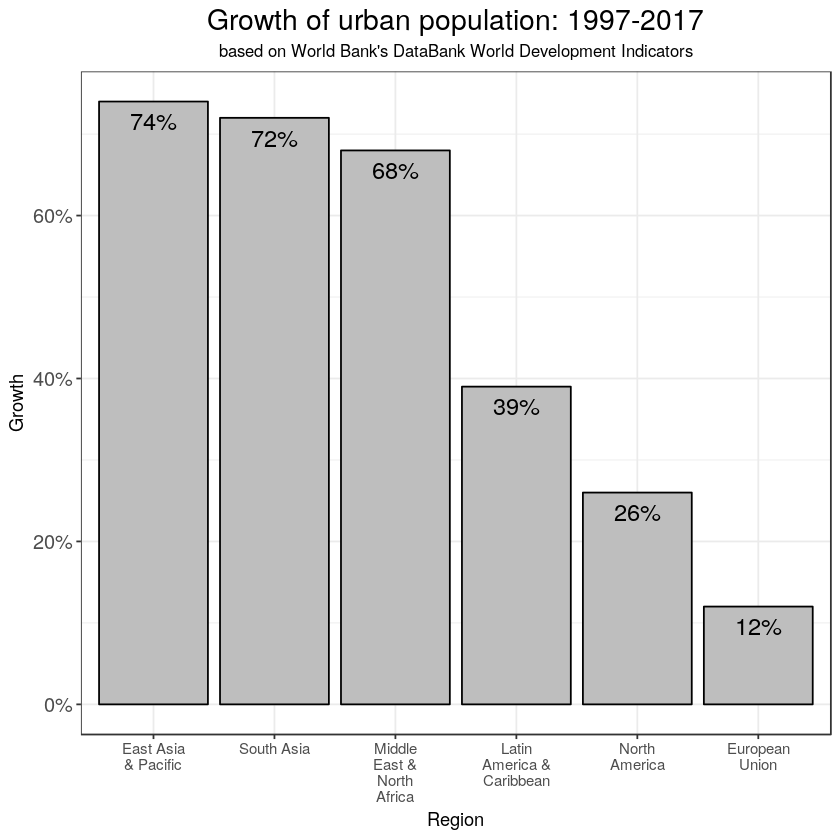

In [43]:
# relative level of urban population in 1997 and 2017
dtUrbanPopulationGrowth <- 
  dtPopulationDataByRegion[, list(Time, country, urban_population_headcount)] %>%
  reshape2::dcast(formula = country ~ Time, 
                  fun.aggregate = sum, value.var = "urban_population_headcount") %>%
  dplyr::rename("Y1997" = "1997", "Y2017" = "2017") %>%
  dplyr::mutate(growth_rate = Y2017/Y1997) %>%
  data.table::as.data.table()
dtUrbanPopulationGrowth <- 
  dtUrbanPopulationGrowth[order(-growth_rate), list(country, growth_rate)]
dtUrbanPopulationGrowth$country_wrap <- stringr::str_wrap(dtUrbanPopulationGrowth$country, width = 10L)
dtUrbanPopulationGrowth$growth_rate <- (round(dtUrbanPopulationGrowth$growth_rate, 2) - 1)

plotUrbanisationRatio <- ggplot2::ggplot(data = dtUrbanPopulationGrowth) + 
  ggplot2::aes(x = country_wrap, y = growth_rate) +
  ggplot2::geom_bar(stat = "identity", color = "black", fill = "grey") +
  ggplot2::theme_bw() + 
  ggplot2::scale_x_discrete(limits = dtUrbanPopulationGrowth$country_wrap) +
  ggplot2::scale_y_continuous(labels = function(x) paste0(x*100, "%")) +
  ggplot2::geom_text(mapping = ggplot2::aes(label = paste0(growth_rate*100, "%")), 
                     vjust = 1.6, color = "black", size = 5) +
  ggplot2::ggtitle(label = "Growth of urban population: 1997-2017", 
                   subtitle = "based on World Bank's DataBank World Development Indicators") +
  ggplot2::xlab(label = "Region") +
  ggplot2::ylab("Growth") + 
  ggplot2::theme(axis.text.y = ggplot2::element_text(size = 12),
                 plot.title = ggplot2::element_text(hjust = 0.5, size = 17), 
                 plot.subtitle = ggplot2::element_text(hjust = 0.5, size = 10), 
                 axis.text.x = ggplot2::element_text(size = 9), 
                 axis.title.x = ggplot2::element_text(size = 11))
plotUrbanisationRatio

In [33]:
# zoom in on selected countries in regions: East Asia & Pacific and South Asia


## 2. Economy

In [44]:
# load economic data
dtEconomicData <- read.csv(file = file.path(getwd(), "data", 
                                            "GrandChessboardEconomic_Data.csv"), 
                           stringsAsFactors = TRUE, na.strings = "..") %>%
  data.table::as.data.table()
data.table::setnames(x = dtEconomicData, 
                     old = c(
                       "Country.Name",
                       "GDP..constant.2010.US....NY.GDP.MKTP.KD.",
                       "GDP..current.US....NY.GDP.MKTP.CD.",
                       "GDP..PPP..constant.2011.international.....NY.GDP.MKTP.PP.KD.",
                       "Goods.exports..BoP..current.US....BX.GSR.MRCH.CD.",
                       "Goods.imports..BoP..current.US....BM.GSR.MRCH.CD.",
                       "Energy.use..kg.of.oil.equivalent.per.capita...EG.USE.PCAP.KG.OE."
                     ), 
                     new = c(
                       "region",
                       "GDP_constant_2010_USD",
                       "GDP_current_USD",
                       "GDP_PPP_constant_2011_USD",
                       "goods_exports_current_USD",
                       "goods_imports_current_USD",
                       "energy_use_kg_of_oil_equivalent_per_capita"
                     ))
dtEconomicData <- dtEconomicData %>%
  dplyr::select(c(-"Country.Code", -"Time.Code")) %>%
  dplyr::filter(Time %in% c(1997, 2014, 2017)) %>% 
  data.table::as.data.table()

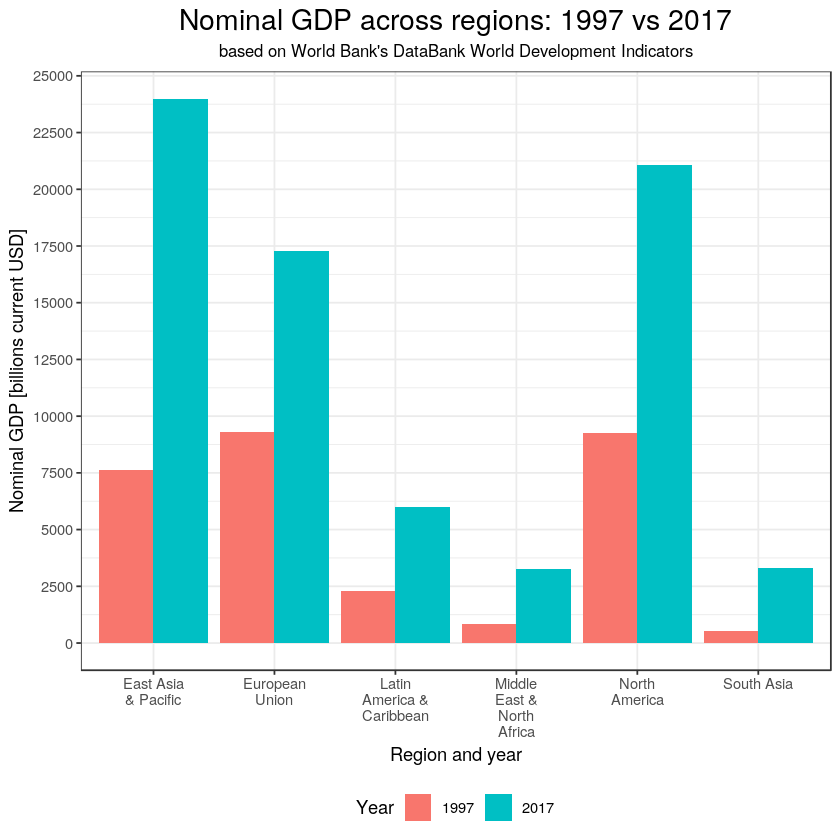

In [46]:
# nominal GDP comparison
dtNominalGdp <- dtEconomicData[Time %in% c(1997, 2017), 
                               list(region, Time, GDP_current_USD)]
dtNominalGdp$region_wrap <- stringr::str_wrap(dtNominalGdp$region, width = 10L)
dtNominalGdp$GDP_current_USD_billions <- dtNominalGdp$GDP_current_USD/10^9
dtNominalGdp$Time <- as.character(dtNominalGdp$Time)

plotGdpByRegion <- ggplot2::ggplot(data = dtNominalGdp) +
  ggplot2::aes(x = region_wrap, y = GDP_current_USD_billions, fill = Time) +
  ggplot2::geom_bar(stat = "identity", position = ggplot2::position_dodge()) +
  ggplot2::theme_bw() +
  ggplot2::xlab(label = "Region and year") +
  ggplot2::labs(fill = "Year") +
  ggplot2::ggtitle(label = "Nominal GDP across regions: 1997 vs 2017", 
                   subtitle = "based on World Bank's DataBank World Development Indicators") +
  ggplot2::ylab(label = "Nominal GDP [billions current USD]") +
  ggplot2::theme(legend.position = "bottom", 
                 plot.title = ggplot2::element_text(hjust = 0.5, size = 17),
                 plot.subtitle = ggplot2::element_text(hjust = 0.5, size = 10)) +
  ggplot2::scale_y_continuous(minor_breaks = seq(0, 25000, 1250), 
                              breaks = seq(0, 25000, 2500), 
                              labels = seq(0, 25000, 2500))
plotGdpByRegion

In [58]:
# GDP PPP comparison: 1997 vs 2017
dtGdpPpp <- dtEconomicData[Time %in% c(1997, 2017), 
                               list(region, Time, GDP_PPP_constant_2011_USD)]
dtGdpPpp$region_wrap <- stringr::str_wrap(dtGdpPpp$region, width = 10L)
dtGdpPpp$GDP_PPP_billions <- dtGdpPpp$GDP_PPP_constant_2011_USD/10^9
dtGdpPpp$Time <- as.character(dtGdpPpp$Time)
dtGdpPpp

region,Time,GDP_PPP_constant_2011_USD,region_wrap,GDP_PPP_billions
Middle East & North Africa,1997,"3,802456e+12",Middle East & North Africa,"3802,456"
Middle East & North Africa,2017,"8,039318e+12",Middle East & North Africa,"8039,318"
European Union,1997,"1,344827e+13",European Union,"13448,267"
European Union,2017,"1,907598e+13",European Union,"19075,975"
East Asia & Pacific,1997,"1,333105e+13",East Asia & Pacific,"13331,047"
East Asia & Pacific,2017,"3,824738e+13",East Asia & Pacific,"38247,383"
South Asia,1997,"2,956271e+12",South Asia,"2956,271"
South Asia,2017,"1,058331e+13",South Asia,"10583,313"
North America,1997,"1,240528e+13",North America,"12405,276"
North America,2017,"1,928167e+13",North America,"19281,673"


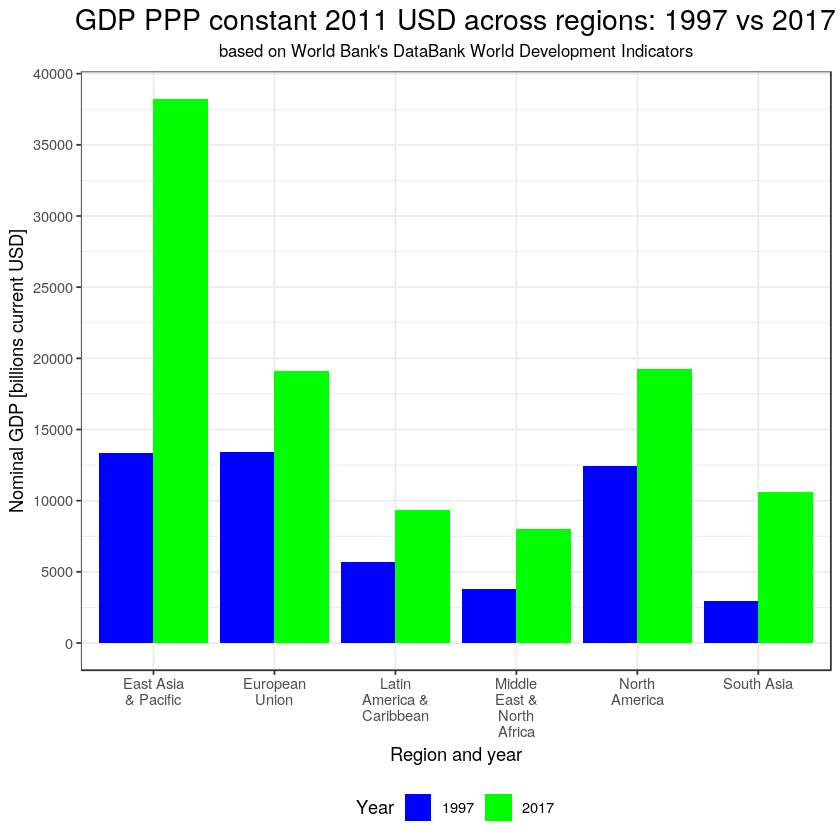

In [64]:
order_by_GDP_PPP_2017 <- dtGdpPpp[order(-GDP_PPP_billions, Time), ]
plotGdpByRegion <- ggplot2::ggplot(data = dtGdpPpp) +
  ggplot2::aes(x = region_wrap, y = GDP_PPP_billions, fill = Time) +
  ggplot2::geom_bar(stat = "identity", position = ggplot2::position_dodge()) +
  ggplot2::theme_bw() +
  ggplot2::scale_x_discrete(limits = c("East Asia\n& Pacific", 
                                       "North\nAmerica",
                                       "European\nUnion",
                                       "South Asia", 
                                       "Latin\nAmerica &\nCaribbean", 
                                       "Middle\nEast &\nNorth\nAfrica")) + 
  ggplot2::xlab(label = "Region and year") +
  ggplot2::labs(fill = "Year") +
  ggplot2::ggtitle(label = "GDP PPP constant 2011 USD across regions: 1997 vs 2017", 
                   subtitle = "based on World Bank's DataBank World Development Indicators") +
  ggplot2::ylab(label = "Nominal GDP [billions current USD]") +
  ggplot2::theme(legend.position = "bottom", 
                 plot.title = ggplot2::element_text(hjust = 0.5, size = 17),
                 plot.subtitle = ggplot2::element_text(hjust = 0.5, size = 10)) +
  ggplot2::scale_fill_manual(values = c("blue", "green")) + 
  ggplot2::scale_y_continuous(minor_breaks = seq(0, 40000, 2500), 
                              breaks = seq(0, 40000, 5000), 
                              labels = seq(0, 40000, 5000))



plotGdppPppByRegion
